*Our client is an Insurance company that has provided Health Insurance to its customers now they need our help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.*

Data: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction/data

# 0.0 Imports and functions

In [ ]:
import pandas   as pd
import numpy    as np
import seaborn  as sns
import sweetviz as sv

from matplotlib import  pyplot  as plt
from ipywidgets import  HTML

from ydata_profiling    import  ProfileReport

In [ ]:
# Changing the plt layout
def jupyter_settings():
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()

# Call the function 
jupyter_settings()

## 0.1 Read csv

In [ ]:
# Read csv
df_train    =   pd.read_csv('./dataset/train.csv')

In [ ]:
# Print csv
df_train.head()

# 1.0 Data description

In [ ]:
df1 = df_train.copy()  # Created a copy of the original DataFrame

# Perform the cleaning on the column names.
df1.columns = df1.columns.str.lower()
df1.columns = df1.columns.str.strip()
df1.columns = df1.columns.str.replace(' ', '_')

## 1.1 Columns

In [ ]:
# Print columns
df1.columns

## 1.2 Data dimension

In [ ]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

## 1.3 Data types

In [ ]:
df1.dtypes

## 1.4 Column description

**id int64** =>  "Unique ID for the customer"

**gender object** =>  "Male and Female"

**age int64** =>  "Age 20-85"

**driving_license int64** =>  "Driving_License 0 : Customer does not have DL, 1 : Customer already has DL"

**region_code float64** =>  "Unique code for the region of the customer"

**previously_insured int64** =>  "1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance"

**vehicle_age object** =>  "Age of the Vehicle"

**vehicle_damage object** =>  "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past."

**annual_premium float64** =>  "The amount customer needs to pay as premium in the year"
-- The monthly amount is paid per year

**policy_sales_channel float64** =>  "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc."

**vintage int64** =>  "Number of Days, Customer has been associated with the company"

**response int64** =>  "	1 : Customer is interested, 0 : Customer is not interested"

## 1.5 Questions

**id int64** =>  "Unique ID for the customer"
- No questions found for "id"

**gender object** =>  "Male and Female"
- Women take more care of their health
- Male has more car
- Male has more *driving_license*
- Male has more *previously_insured*

**age int64** =>  "Age 20-85"
- The older the more interested
- The older the driving_license
- The older the previously_insured
- The older the more annual_premium 

**driving_license int64** =>  "Driving_License 0 : Customer does not have DL, 1 : Customer already has DL"
- The customer who already has a DL, has previously_insured
- The customer who already has a DL, has vehicle_damage

**region_code float64** =>  "Unique code for the region of the customer"


**previously_insured int64** =>  "1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance"
- previously_insured is a vehicle_age, vehicle_damage

**vehicle_age object** =>  "Age of the Vehicle"
- Idade do veiculo, quanto mais velho possivelmente já tenha seguro e não vai ter interesse

**vehicle_damage object** =>  "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past."
- Se teve algum dano no carro, possivelmente tem interesse pois foi caro o valor de pagamento

**annual_premium float64** =>  "The amount customer needs to pay as premium in the year" -- The monthly amount is paid per year
- Se paga mais, tem mais dinheiro. Possivelmente vai querer o seguro se gostar da empresa

**policy_sales_channel float64** =>  "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc."
- Codigo de canal de divulgação

**vintage int64** =>  "Number of Days, Customer has been associated with the company"
- Quanto mais tempo associado, mas provavemente aceitar

**response int64** =>  "	1 : Customer is interested, 0 : Customer is not interested"
- 1 Interessado
- 0 Desinteressado

# 2.0 Feature Engineering

In [ ]:
df2 = df1.copy()

## 2.1 Feature Engineering

In [ ]:
df2.head()

In [ ]:
df2['vehicle_age'].unique()

In [ ]:
# Female    =   0
# Male      =   1
df2['gender']           =   df2['gender'].map({'Female': 0, 'Male': 1})

# Menos de 1 ano    =   0
# Entre 1 e 2 anos  =   1
# Mais de 2 anos    =   2
df2['vehicle_age']      =   df2['vehicle_age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})

# Yes   =   1
# No    =   0
df2['vehicle_damage']   =   df2['vehicle_damage'].map({'No': 0, 'Yes': 1})

In [ ]:
len(df2['annual_premium'].unique()), len(df2)

In [ ]:
# # Analisando se tem outliers => Acredito que não, o valor paga mais alto em um convenio é mesmo uma opção para poucos.
# len(df2[df2['annual_premium'] > 350000]['annual_premium'].unique()), len(df2[df2['annual_premium'] > 350000])

In [ ]:
# sorted(df2[df2['annual_premium'] > 90000]['annual_premium'].unique(), reverse=True)
# # sorted(df2[df2['annual_premium'] > 80000]['annual_premium'].unique())

# # 540165
# # 55177

In [ ]:
# my_report = sv.analyze(df2)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [ ]:
# profile = ProfileReport(df2, title="Profiling Report")
# profile

## 2.2 Target field analysis 1 or 0

In [ ]:
df2_response_1 = df2[df2['response'] == 1]
df2_response_0 = df2[df2['response'] == 0]

In [ ]:
df2[['response', 'driving_license']].groupby('driving_license').count()
df2['driving_license'].unique()
# sorted(df2['driving_license'].unique())

In [ ]:
df2_response_1.describe()
#   "gender"                =>  Bem distribuido
#   "age"                   =>  Média maior
#   "driving_license"       =>  Bem distribuido
#   "region_code"           =>  Vamos ver sobre isso.
#   "previously_insured"    =>  Não tem seguro automovel


#   "vehicle_age"           =>  Tem mais volume no valor = 1 (Entre 1 e 2 anos)
#   "vehicle_damage"        =>  Tem mais volume no valor = 1 (Sim, teve o veiculo danificado)
#   "annual_premium"        =>  Parece estar muito bem destribuidos
#   "policy_sales_channel"  =>  Analisar os canais de comunicação, achar o melhor canal!
#   "vintage"               =>  Parece estar muito bem destribuidos

In [ ]:
df2_response_0.describe()

In [ ]:
df2.head()

In [ ]:
# Calcular a matriz de correlação
matriz_correlacao = df2.drop(columns=['id']).corr()
# matriz_correlacao

# Criar um gráfico de calor usando Seaborn
# sns.set(style="white")  # Estilo do gráfico
# plt.figure(figsize=(8, 6))  # Tamanho da figura
sns.heatmap(matriz_correlacao, cmap="coolwarm", annot=True)
plt.title('Matriz de Correlação')
plt.show()

# 3.0. Data Filtering

In [ ]:
df3 = df2.copy()

# 4.0. EDA

In [ ]:
df4 = df3.copy()

In [ ]:
df4.columns

In [ ]:
df4_gender              =   df4[['id', 'gender', 'response']].groupby(['gender', 'response']).count().reset_index()
df4_gender['gender']    =   df4_gender['gender'].map({0 : 'Female', 1 : 'Male'})
df4_gender['response']  =   df4_gender['response'].map({0 : 'Não', 1 : 'Sim'})

count_male                  =   df4_gender[df4_gender['gender'] == 'Male']['id'].sum()
count_female                =   df4_gender[df4_gender['gender'] == 'Female']['id'].sum()
df4_gender['gender_per']    =   df4_gender.apply( lambda x: (x['id'] / count_male) if x['gender'] == 'Male' else (x['id'] / count_female) , axis=True )
df4_gender['gender_per']    =   (df4_gender['gender_per'] * 100).round(2)

df4_gender.head()

In [ ]:
# sns.histplot( df4 )
df4.hist();

## 4.1 Column - Gender

In [ ]:
sns.barplot(data=df4_gender, x='gender', y='gender_per',  hue='response')
plt.show()

# df4_gender              =   df4.copy()
# df4_gender['gender']    =   df4_gender['gender'].map({0 : 'Female', 1 : 'Male'})
# df4_gender['response']  =   df4_gender['response'].map({0 : 'Não', 1 : 'Sim'})

# sns.displot(data=df4_gender, x="gender", hue="response", multiple="stack")

## 4.2 Column - age

In [ ]:
# sorted(df4['age'].unique())
df4_age             =   df4[['id', 'age', 'response']].groupby(['age', 'response']).count().reset_index()
df4_age['response'] =   df4_age['response'].map({0 : 'Não', 1 : 'Sim'})
df4_age.columns     =   ['age', 'response', 'count']

# df4_age.head()

In [ ]:
# Criar um gráfico de linha com rótulos para todos os pontos no eixo x
ax = sns.lineplot(data=df4_age, x="age", y="count", hue="response", style="response", markers=True, dashes=False)

# Adicionar rótulos a todos os pontos no eixo x
for x, y, label in zip(df4_age["age"], df4_age["count"], df4_age["age"]):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(0,5), ha='center')

# Adicionar rótulos aos eixos
plt.xlabel('Idade')
plt.ylabel('Quantidade')

# Exibir o gráfico
plt.show()

## 4.3 Column - driving_license

In [ ]:
df4_driving_license             =   df4[['id', 'driving_license', 'response']].groupby(['driving_license', 'response']).count().reset_index()
df4_driving_license.columns     =   ['driving_license', 'response', 'count']
df4_driving_license['response'] =   df4_driving_license['response'].map({0 : 'Não', 1 : 'Sim'})
df4_driving_license

## 4.4 Column - region_code

In [357]:
region_code             =   df4[['id', 'region_code', 'response']].groupby(['region_code', 'response']).count().reset_index()
region_code.columns     =   ['region_code', 'response', 'count']
region_code['response'] =   region_code['response'].map({0 : 'Não', 1 : 'Sim'})

In [362]:
region_code.head()

,region_code,response,count
0,0.0,Não,1847
1,0.0,Sim,174
2,1.0,Não,899
3,1.0,Sim,109
4,2.0,Não,3751


In [ ]:
sns.lineplot(data=region_code, x="region_code", y="count", hue="response");

In [360]:
df_raw = region_code.groupby(['region_code', 'response']).sum().reset_index()

In [361]:
df_raw.head()

,region_code,response,count
0,0.0,Não,1847
1,0.0,Sim,174
2,1.0,Não,899
3,1.0,Sim,109
4,2.0,Não,3751


In [342]:
df_aux = pd.merge(df_raw, region_code, on='region_code', how='outer')
df_aux['count_per'] = (100 / df_aux['count_x'] * df_aux['count_y']).round(2)

In [353]:
df_aux = df_aux.sort_values('count_per', ascending=False)

In [355]:
# df_aux['']

## 4.5 Column - previously_insured

In [ ]:
previously_insured             =   df4[['id', 'previously_insured', 'response']].groupby(['previously_insured', 'response']).count().reset_index()
previously_insured.columns     =   ['previously_insured', 'response', 'count']
previously_insured['response'] =   previously_insured['response'].map({0 : 'Não', 1 : 'Sim'})

## 4.6 Column - vehicle_age

In [ ]:
vehicle_age             =   df4[['id', 'vehicle_age', 'response']].groupby(['vehicle_age', 'response']).count().reset_index()
vehicle_age.columns     =   ['vehicle_age', 'response', 'count']
vehicle_age['response'] =   vehicle_age['response'].map({0 : 'Não', 1 : 'Sim'})

In [326]:
df_raw = vehicle_age.groupby('vehicle_age').sum().reset_index()
df_raw = pd.merge(vehicle_age, df_raw[['vehicle_age', 'count']], on='vehicle_age', how='inner')
# df_aux = pd.merge(df4_aux_response_sim, df4_aux_count_all, on='policy_sales_channel', how='inner')
# vehicle_age.head()
df_raw['count_per'] = (100 / df_raw['count_y'] * df_raw['count_x'])

In [329]:
# df_raw.sort_values('count_per')

## 4.7 Column - vehicle_damage

In [ ]:
vehicle_damage             =   df4[['id', 'vehicle_damage', 'response']].groupby(['vehicle_damage', 'response']).count().reset_index()
vehicle_damage.columns     =   ['vehicle_damage', 'response', 'count']
vehicle_damage['response'] =   vehicle_damage['response'].map({0 : 'Não', 1 : 'Sim'})

## 4.8 Column - annual_premium 

In [ ]:
annual_premium             =   df4[['id', 'annual_premium', 'response']].groupby(['annual_premium', 'response']).count().reset_index()
annual_premium.columns     =   ['annual_premium', 'response', 'count']
annual_premium['response'] =   annual_premium['response'].map({0 : 'Não', 1 : 'Sim'})

## 4.9 Column - policy_sales_channel

In [ ]:
policy_sales_channel             =   df4[['id', 'policy_sales_channel', 'response']].groupby(['policy_sales_channel', 'response']).count().reset_index()
policy_sales_channel.columns     =   ['policy_sales_channel', 'response', 'count']
policy_sales_channel['response'] =   policy_sales_channel['response'].map({0 : 'Não', 1 : 'Sim'})
policy_sales_channel.head()

In [ ]:
# policy_sales_channel['count'] = np.log(policy_sales_channel['count'])
# sns.lineplot(data= policy_sales_channel, x="policy_sales_channel", y="count", hue="response", marker="o");

In [ ]:
df4_aux_count_all = policy_sales_channel[['count', 'policy_sales_channel']].groupby('policy_sales_channel').sum().reset_index()
df4_aux_count_all.head()

In [ ]:
policy_sales_channel['percentual'] = policy_sales_channel.groupby('policy_sales_channel')['count'].transform(lambda x: x / x.sum() * 100)
df4_aux_response_sim = policy_sales_channel[policy_sales_channel['response'] == 'Sim'].sort_values('percentual', ascending=False)

df_aux = pd.merge(df4_aux_response_sim, df4_aux_count_all, on='policy_sales_channel', how='inner')

In [ ]:
df_aux = df_aux[df_aux['count_x'] != df_aux['count_y']].reset_index(drop=True)
df_aux.reset_index(inplace=True)
df_aux = df_aux[['index', 'policy_sales_channel']]

In [ ]:
df_aux['index'] = df_aux['index'] + 1
df_aux.columns = ['policy_sales_channel_edited', 'policy_sales_channel']
df4_end = pd.merge(df4, df_aux, on='policy_sales_channel', how='outer')

In [ ]:
df4_end.head()

## 4.10 - vintage

In [ ]:
vintage             =   df4[['id', 'vintage', 'response']].groupby(['vintage', 'response']).count().reset_index()
vintage.columns     =   ['vintage', 'response', 'count']
vintage['response'] =   vintage['response'].map({0 : 'Não', 1 : 'Sim'})

In [ ]:
df_aux_vintage = vintage[['vintage', 'count']].groupby('vintage').sum().reset_index()

In [ ]:
df_aux_vintage = pd.merge( df_aux_vintage, vintage, on='vintage', how='outer' )

In [ ]:
df_aux_vintage['count_per'] = (100 / df_aux_vintage['count_x'] * df_aux_vintage['count_y']).round(2)

In [ ]:
df_aux_vintage_sim = df_aux_vintage[df_aux_vintage['response'] == 'Sim']
df_aux_vintage_nao = df_aux_vintage[df_aux_vintage['response'] == 'Não']

In [ ]:
df_aux_vintage = df_aux_vintage_sim.sort_values('count_per', ascending=False).reset_index(drop=True).reset_index()

In [ ]:
df_aux_vintage = df_aux_vintage[['index', 'vintage']]
df_aux_vintage.columns = ['vintage_edited', 'vintage']

In [ ]:
df4_end = pd.merge(df4_end, df_aux_vintage, on='vintage', how='outer')

In [299]:
df4_end[df4_end['policy_sales_channel_edited'].isna()]  =   0
df4_end[df4_end['policy_sales_channel_edited'] == 0]    =   max(df4_end['policy_sales_channel_edited']) + 1

## 4.11 - CORR

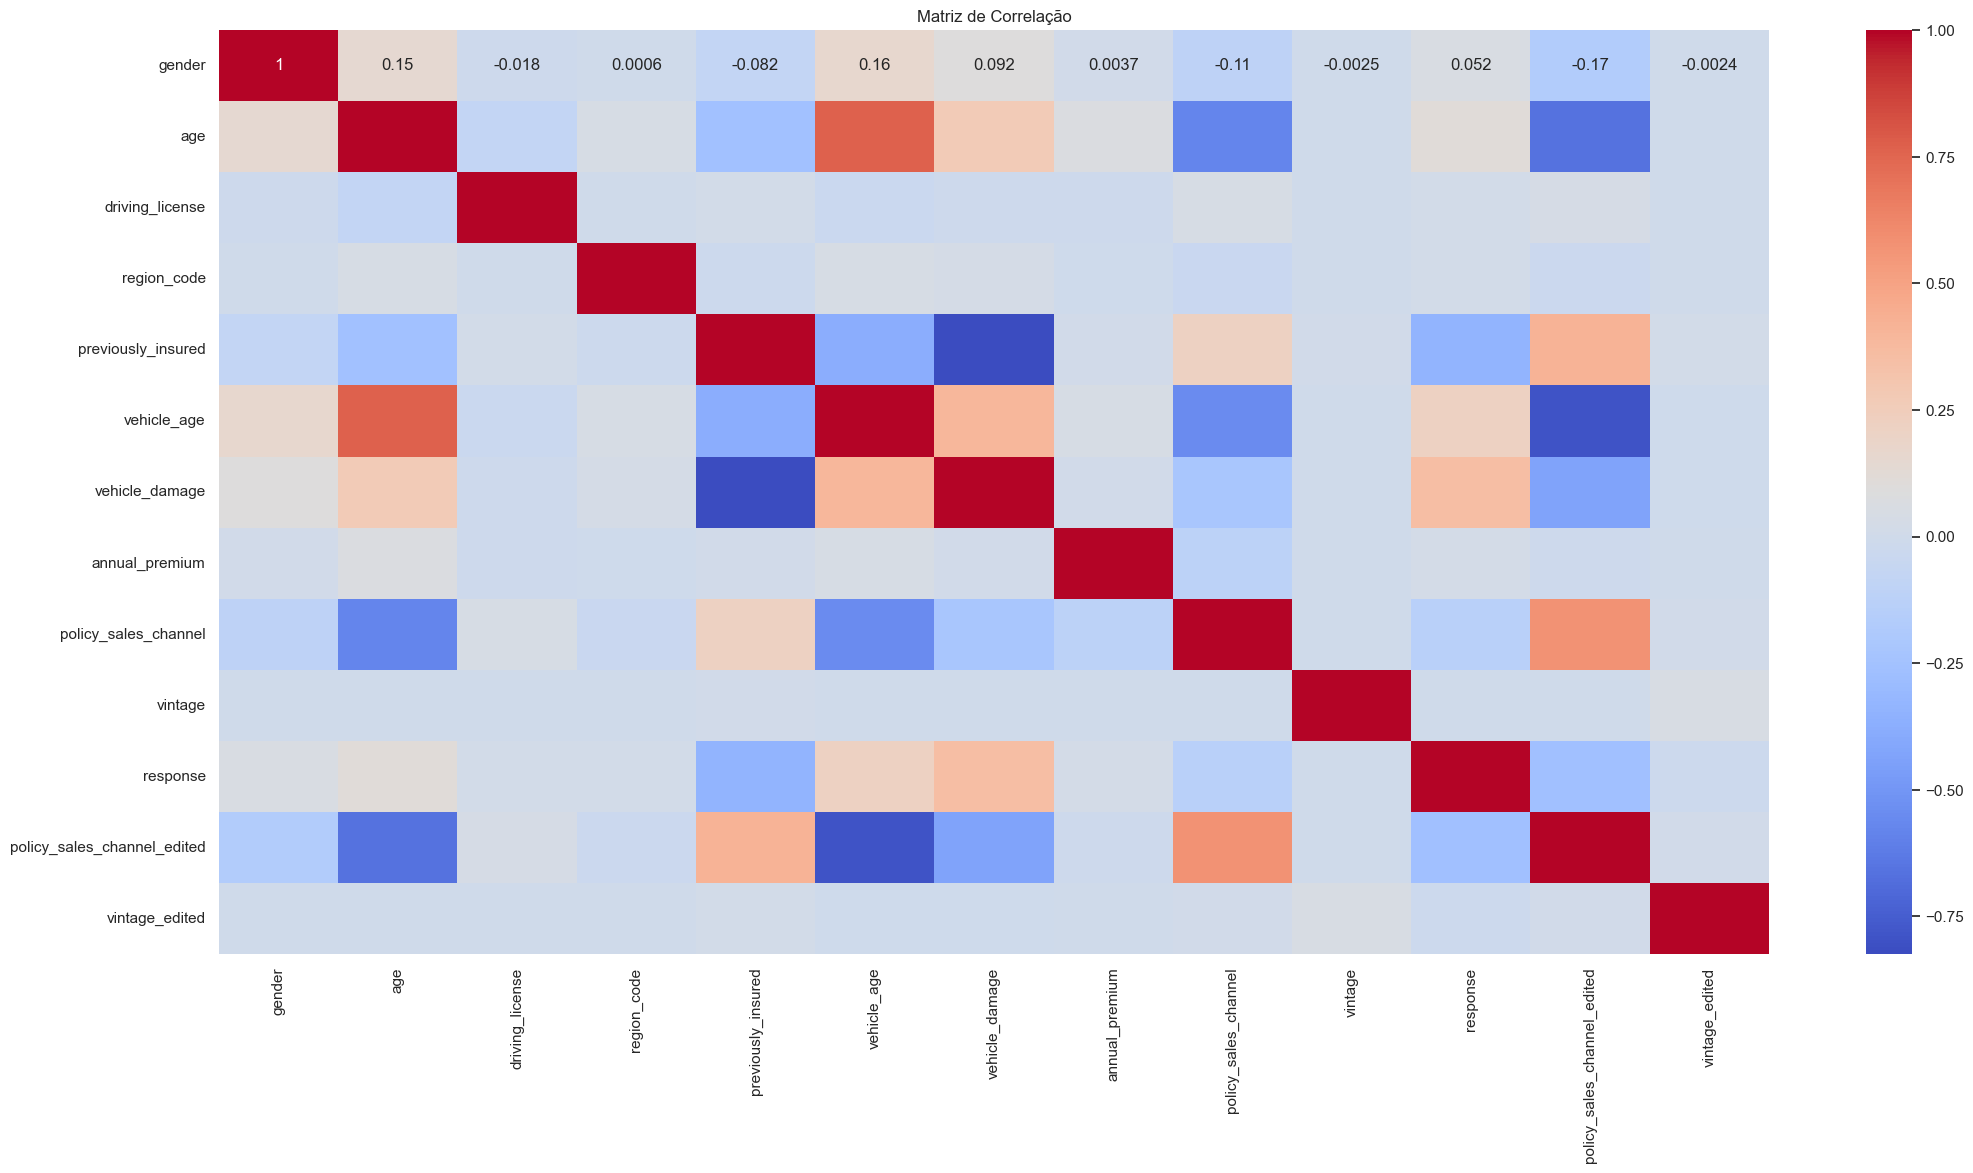

In [285]:
# Calcular a matriz de correlação
matriz_correlacao = df4_end.drop(columns=['id']).corr()
# matriz_correlacao

# Criar um gráfico de calor usando Seaborn
# sns.set(style="white")  # Estilo do gráfico
# plt.figure(figsize=(8, 6))  # Tamanho da figura
sns.heatmap(matriz_correlacao, cmap="coolwarm", annot=True)
plt.title('Matriz de Correlação')
plt.show()

# 5.0. Data Preparation

# 6.0. Feature Selection

# 7.0. Machine Learning

# 8.0. Model Performance 